In [1]:
import os
import pickle

from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

os.chdir('../')
from utils.config_dataset import *

import warnings
warnings.filterwarnings("ignore")

In [2]:
# limit CPU cores used by the script

os.environ["OMP_NUM_THREADS"] = "32" # export OMP_NUM_THREADS=1
os.environ["OPENBLAS_NUM_THREADS"] = "32" # export OPENBLAS_NUM_THREADS=1
os.environ["MKL_NUM_THREADS"] = "32" # export MKL_NUM_THREADS=1
os.environ["VECLIB_MAXIMUM_THREADS"] = "32" # export VECLIB_MAXIMUM_THREADS=1
os.environ["NUMEXPR_NUM_THREADS"] = "32" # export NUMEXPR_NUM_THREADS=1

In [3]:
patient_info = pickle.load(open(os.path.join(path_processed, 'patient_info_valid.p'), 'rb')) 
pharma_list = INPUT_OF_INTEREST
pharma_list.remove(1000659) # too few samples
pharma_list

[1000655, 1000658, 1000747, 1000649, 1000657, 426, 1000251, 208, 251]

# Load data samples

In [15]:
# path_samples = os.path.join(path_processed, 'training_samples-v2')

# pid_dict = {pharma:set() for pharma in pharma_list}
# samples = []
# sample_dict = {}

# i = 0
# for pharma in pharma_list:
#     print(f'--------------------{pharma}------------------')
#     path_pharma_sample = os.path.join(path_samples, str(pharma))
#     data_files = os.listdir(path_pharma_sample)
#     for file in tqdm(data_files):
#         pid = int(file.split('_')[0])
#         pid_dict[pharma].add(pid)
        
#         data = pickle.load(open(os.path.join(path_pharma_sample, file), 'rb'))
#         data_cols = pd.MultiIndex.from_tuples(data.columns)
#         data.columns = data_cols
        
#         selected_cols = [('pharma_impact', 0)]\
#                         + [('pharma', str(ph)) for ph in pharma_list]\
#                         + [col for col in data.columns if col[0] == 'physio_num']
#         data = data.loc[:, selected_cols]

#         samples.append(data.values)
        
#         sample_dict[i] = {}
#         sample_dict[i]['pharmaid'] = pharma
#         sample_dict[i]['pid'] = pid
#         sample_dict[i]['age'] = patient_info.loc[patient_info['patientid']==pid, 'age'].item()
#         sample_dict[i]['sex'] = patient_info.loc[patient_info['patientid']==pid, 'sex'].item()
#         sample_dict[i]['apache'] = patient_info.loc[patient_info['patientid']==pid, 'APACHE'].item()
#         adm_time = patient_info.loc[patient_info['patientid']==pid, 'admissiontime'].item()
#         los = patient_info.loc[patient_info['patientid']==pid, 'los'].item()
#         los_curr = los - (data.index[data.shape[0]//2] - adm_time)
#         sample_dict[i]['los'] = los_curr
        
        
#         dischargestatus = patient_info.loc[patient_info['patientid']==pid, 'discharge_status'].item()
#         if dischargestatus == 'alive':
#             sample_dict[i]['survived'] = 1 
#         else:
#             sample_dict[i]['survived'] = 0
            
#         i += 1
        
# samples = np.array(samples)

# len(samples)


--------------------1000655------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 2708/2708 [00:18<00:00, 143.18it/s]


--------------------1000658------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 9357/9357 [01:06<00:00, 141.30it/s]


--------------------1000747------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 26654/26654 [03:06<00:00, 142.95it/s]


--------------------1000649------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 2640/2640 [00:18<00:00, 144.83it/s]


--------------------1000657------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 3941/3941 [00:27<00:00, 143.60it/s]


--------------------426------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 4994/4994 [00:34<00:00, 143.65it/s]


--------------------1000251------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 23971/23971 [02:46<00:00, 143.85it/s]


--------------------208------------------


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 24643/24643 [02:51<00:00, 144.03it/s]


--------------------251------------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 3075/3075 [00:21<00:00, 143.69it/s]


101983

In [16]:
from sklearn.model_selection import train_test_split

pids = set()
for pharma in pid_dict:
    pids = pids.union(pid_dict[pharma])
pids = list(pids)
dischargestatus = [patient_info.loc[patient_info['patientid']==pid, 'discharge_status'].item() 
                   for pid in pids]

pid_train, pid_test= train_test_split(pids, test_size=0.2, random_state=42, stratify=dischargestatus)

In [17]:
pid_train, pid_test, y_train, y_test= train_test_split(pids, dischargestatus,
                                                       test_size=0.2, random_state=42, 
                                                       stratify=dischargestatus)

In [18]:
len(pid_train), len(pid_test), y_train.count('dead'), y_test.count('dead')

(10159, 2540, 625, 156)

In [19]:
idx_train = [i for i in sample_dict if sample_dict[i]['pid'] in pid_train]
idx_test = [i for i in sample_dict if sample_dict[i]['pid'] in pid_test]

In [20]:
data

pharma_impact  pharma                                      \
                                0 1000655 1000658 1000747 1000649 1000657 426   
2178-07-21 05:56:00             1       0     0.0     0.0       0     0.0   0   
2178-07-21 05:58:00             1       0     0.0     0.0       0     0.0   0   
2178-07-21 06:00:00             1       0     0.0     0.0       0     0.0   0   
2178-07-21 06:02:00             1       0     0.0     0.0       0     0.0   0   
2178-07-21 06:04:00             1       0     0.0     0.0       0     0.0   0   
...                           ...     ...     ...     ...     ...     ...  ..   
2178-07-21 11:48:00             1       0     0.0     0.0       0     0.0   0   
2178-07-21 11:50:00             1       0     0.0     0.0       0     0.0   0   
2178-07-21 11:52:00             1       0     0.0     0.0       0     0.0   0   
2178-07-21 11:54:00             1       0     0.0     0.0       0     0.0   0   
2178-07-21 11:56:00             1       0     0.0     0.0       0     0.0   0   

                                           physio_num                      \
                    1000251       208  251          1      2    18     24   
2178-07-21 05:56:00     0.0  0.665771  0.0       94.0  11.10  76.0  151.0   
2178-07-21 05:58:00     0.0  0.665357  0.0       94.0  11.60  80.0  180.0   
2178-07-21 06:00:00     0.0  0.665357  0.0       95.0  17.80  79.0  146.0   
2178-07-21 06:02:00     0.0  0.665357  0.0       96.0  20.00  85.0  142.0   
2178-07-21 06:04:00     0.0  0.666556  0.0       97.0  10.50  78.0  137.0   
...                     ...       ...  ...        ...    ...   ...    ...   
2178-07-21 11:48:00     0.0  0.000000  0.0        NaN    NaN   NaN    NaN   
2178-07-21 11:50:00     0.0  0.000000  0.0       92.5  16.75  87.0  177.5   
2178-07-21 11:52:00     0.0  0.000000  0.0       90.0  15.90  86.5  164.0   
2178-07-21 11:54:00     0.0  0.000000  0.0       90.0  18.90  87.0  176.0   
2178-07-21 11:56:00     0.0  0.000000  0.0       93.0  21.30  88.0  179.0   

                                                                     
                       25    26   34         43        45        46  
2178-07-21 05:56:00  49.0  72.0  NaN  101.20482  0.053331  1.406246  
2178-07-21 05:58:00  64.0  94.0  NaN  101.20482  0.053624  1.406246  
2178-07-21 06:00:00  59.0  83.0  NaN  101.20482  0.053624  1.406246  
2178-07-21 06:02:00  54.0  75.0  NaN  101.20482  0.125737  1.406246  
2178-07-21 06:04:00  52.0  73.0  NaN  101.20482  0.000000  1.406246  
...                   ...   ...  ...        ...       ...       ...  
2178-07-21 11:48:00   NaN   NaN  NaN  225.00000  0.067220  0.834821  
2178-07-21 11:50:00  61.5  90.0  9.5  225.00000  0.183296  0.834821  
2178-07-21 11:52:00  54.0  80.0  8.0  225.00000  0.183296  0.834821  
2178-07-21 11:54:00  56.0  83.0  9.0  225.00000  0.183296  0.834821  
2178-07-21 11:56:00  60.0  88.0  9.0  225.00000  0.183296  0.834821  

[181 rows x 20 columns]

# Normalize data

In [21]:
def percentile(n):
    def percentile_(x):
        return x.quantile(n)
    percentile_.__name__ = 'percentile_{:02.0f}'.format(n*100)
    return percentile_

In [22]:
df = []
for sample in tqdm(samples):
    df_ = pd.DataFrame(sample)
    df.append(df_)
    
df = pd.concat(df)
df = df.reset_index(drop=True)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 101983/101983 [00:04<00:00, 22142.54it/s]


In [23]:
df.aggregate(['mean', 'min', 
              percentile(0.00001), percentile(0.0001), percentile(0.001), 
              percentile(0.01), percentile(0.05), percentile(0.1),
              'median',
              percentile(0.9), percentile(0.95), percentile(0.99),
              percentile(0.999), percentile(0.9999), percentile(0.99999), 
              'max'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
mean,0.941074,0.033296,0.064163,0.046611,0.124863,0.262645,0.027322,0.456222,0.950662,0.009492,95.842091,17.275046,89.9625,106.312091,52.581108,70.30332,11.910069,131.419365,2.511950e+24,2.574839e+11
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,-319.360000,-319.360000,-319.36000,-319.360000,0.000000,0.000000e+00,0.000000e+00
percentile_00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.0000,-313.360000,-311.360000,-311.36000,-317.360000,0.000000,0.000000e+00,0.000000e+00
percentile_00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.000000,0.000000,0.0000,0.000000,-22.000000,0.00000,-16.500000,0.000000,0.000000e+00,0.000000e+00
percentile_00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,71.000000,0.000000,42.0000,47.000000,21.000000,35.00000,-4.500000,0.000000,0.000000e+00,0.000000e+00
percentile_01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,84.000000,5.000000,54.0000,62.000000,31.000000,46.00000,0.000000,0.000000,0.000000e+00,1.315789e-01
percentile_05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,6.500000,64.0000,73.000000,37.500000,52.00000,2.000000,5.357143,0.000000e+00,7.245091e-01
percentile_10,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,92.000000,7.000000,70.0000,79.000000,40.000000,55.00000,4.000000,16.956522,0.000000e+00,8.588121e-01
median,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96.000000,16.200000,90.0000,103.500000,51.000000,68.00000,9.000000,69.230770,7.392105e-02,1.858978e+00
percentile_90,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.149734,0.000000,3.329683,0.000000,100.000000,28.000000,110.0000,137.000000,65.000000,86.00000,15.000000,236.065570,1.194598e+00,4.688789e+00


In [4]:
valid_ranges = {
    1: [0, 300],
    2: [0, 220],
    3: [0, 125],
    4: [0, 67],
    5: [0, 167],
    6: [0, 1.5],
    7: [0, 300],
    8: [0, 334],
    9: [0, 12],
    10:[0, 100],
    11:[0, 274],
    12:[0, 300],
    13:[0, 358],
    14:[0, 354],
    15:[0, 361],
    16:[-30, 361],
    17:[0, 3300],
    18:[0, 738],
    19:[0, 70]
}

normal_ranges = {
    1: [0, 300],
    2: [0, 220],
    3: [0, 125],
    4: [0, 67],
    5: [0, 167],
    6: [0, 1.5],
    7: [0, 300],
    8: [0, 334],
    9: [0, 12],
    10:[0, 100],
    11:[0, 274],
    12:[0, 180],
    13:[0, 180],
    14:[0, 180],
    15:[0, 361],
    16:[-30, 361],
    17:[0, 3300],
    18:[0, 738],
    19:[0, 70]
}

In [25]:
for col in valid_ranges:
    r = valid_ranges[col]
    df.loc[(df[col] < r[0]) | (df[col] > r[1])] = np.nan
    df[col] = (df[col] - r[0]) / (r[1]-r[0])

df = df.fillna(-1)

In [26]:
samples_normed = []
grps = df.groupby(df.index // 181)

for _, dfg in tqdm(grps):
    samples_normed.append(dfg.values)
samples_normed = np.array(samples_normed)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 101983/101983 [00:03<00:00, 33269.87it/s]


In [27]:
X_train = samples_normed[idx_train]
X_test = samples_normed[idx_test]

In [28]:
os.path.abspath(path_processed)

'/home/kai/DigitalICU/Experiments/HIRID-PatientStateSpace/processed-v2'

In [29]:
training_data_injectiononly = {
    'samples_raw': samples,
    'samples_norm': samples_normed,
    'sample_dict': sample_dict,
    'idx_train': idx_train,
    'idx_test': idx_test,
    'pid_train': pid_train,
    'pid_test': pid_test,
}

pickle.dump(training_data_injectiononly, 
            open(os.path.join(path_processed, 'training_data_allmed.p'), 'wb'))

In [5]:
############################## samples ##############################
archive = pickle.load(open(os.path.join(path_processed, 'training_data_allmed.p'), 'rb'))
samples = archive['samples_norm']
sample_dict= archive['sample_dict']
idx_train= archive['idx_train']
idx_test= archive['idx_test']
pid_train = archive['pid_train']
pid_test = archive['pid_test']
del archive

labels = pickle.load(open(os.path.join(path_processed, 'training_label_allmed.p'), 'rb'))
for k in labels:
    labels[k] = np.array(labels[k])

In [23]:
selected_pharma

,variableid,variablename
0,1000100,Intravenous blood transfusion of packed cells
1,1000743,Intravenous blood transfusion of packed cells
2,1000050,Transfusion of plasma (FFP)
3,1000201,Platelet transfusion
4,1000799,Haemocomplettan
...,...,...
527,1001045,Madopar Tbl 125 mg
528,1000266,PK-Merz 500 ml
529,1000406,Madopar LIQ 125 mg Tbl
530,1000620,Neupogen 48 Mio U


In [30]:
INPUT_OF_INTEREST_BOLUS

[1000655, 1000658, 1000747]

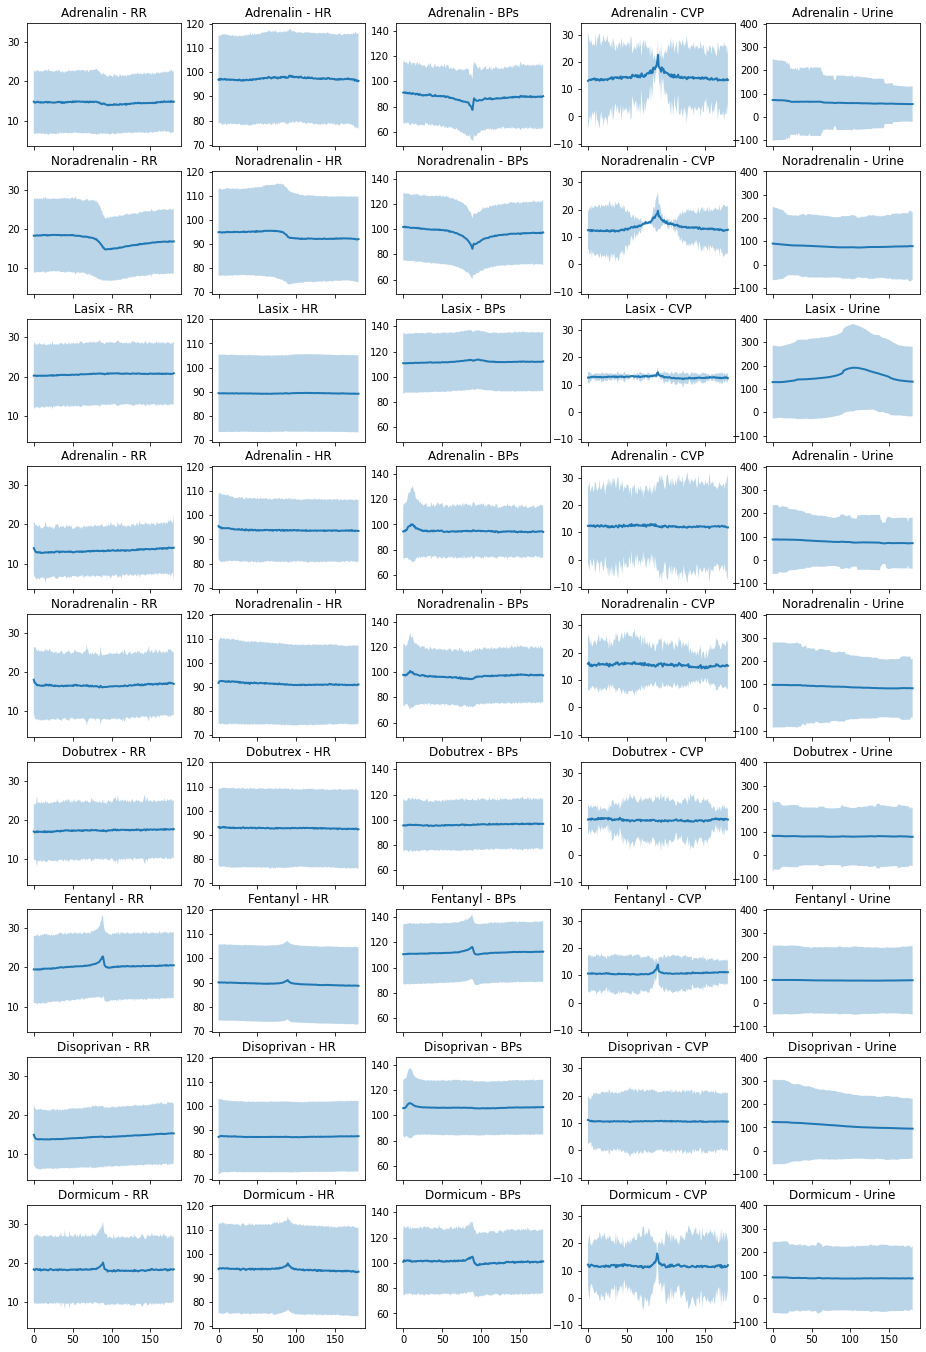

In [22]:
fig, ax = plt.subplots(9, 5, figsize=(16,24), sharex=True, sharey='col')
plt.subplots_adjust(hspace=.2)
idx_vital = {
    11: 'RR',
    12: 'HR',
    13: 'BPs',
    16: 'CVP',
    17: 'Urine'
}


for j, pharmaid in enumerate(INPUT_OF_INTEREST):
    idx_pharma = np.where(labels['pharmaid'] == pharmaid)[0]
    pharmaname = selected_pharma.loc[selected_pharma['variableid']==pharmaid, 'variablename'].item()
    pharmaname = pharmaname.split(' ')[0]
    
    sample = samples[idx_pharma]
    sample[sample==-1] = np.nan

    mean = np.nanmean(sample, axis=0)
    std = np.nanstd(sample, axis=0)
    
    for i, vitalid in enumerate(idx_vital):
        mean_ = mean[:, vitalid]
        std_ = std[:, vitalid]
        max_ = valid_ranges[vitalid][1]
        min_ = valid_ranges[vitalid][0]
        mean_ = mean_ * (max_ - min_) + min_
        std_ = std_ * (max_ - min_) + min_
        
#         idx_sub = np.random.choice(sample.shape[0], 30)
#         for idx in idx_sub:
#             ax[j][i].plot(sample[idx, :, vitalid], color='gray');
            
        ax[j][i].plot(mean_, linewidth=2);
        ax[j][i].fill_between(range(181), 
                        mean_-std_, 
                        mean_+std_, 
                        alpha=.3)
    #     ax.set_ylim(0.2, 0.4)
        ax[j][i].set_title(f'{pharmaname} - {idx_vital[vitalid]}')

# PCA clustering

In [17]:
from sklearn.decomposition import KernelPCA
from sklearn.covariance import MinCovDet

def plot_pca_explained_variance(pca):
    try:
        exp_var_pca = pca.explained_variance_ratio_
    except:
        exp_var = numpy.var(kpca_transform, axis=0)
        exp_var_pca = exp_var / numpy.sum(exp_var)
    #
    # Cumulative sum of eigenvalues; This will be used to create step plot
    # for visualizing the variance explained by each principal component.
    #
    cum_sum_eigenvalues = np.cumsum(exp_var_pca)
    #
    # Create the visualization plot
    #
    plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
    plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal component index')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

In [60]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

labels = {label:[] for label in ['pharmaid', 'apache', 'age', 'los', 'survived']}

for k in tqdm(sample_dict):
    for label in ['pharmaid', 'apache', 'age', 'los', 'survived']:
        labels[label].append(sample_dict[k][label])
        
for label in labels:
    ll = label_encoder.fit_transform(labels[label])
    labels[label] = ll

100%|██████████████████████████████████████████████████████████████████| 34568/34568 [00:00<00:00, 461340.48it/s]


In [18]:
X = samples_normed.copy().reshape(samples_normed.shape[0], -1)

pca = KernelPCA(n_components=10, kernel='linear', n_jobs=48)
pca.fit(X)
# plot_pca_explained_variance(pca)

AttributeError: 'KernelPCA' object has no attribute 'explained_variance_ratio_'

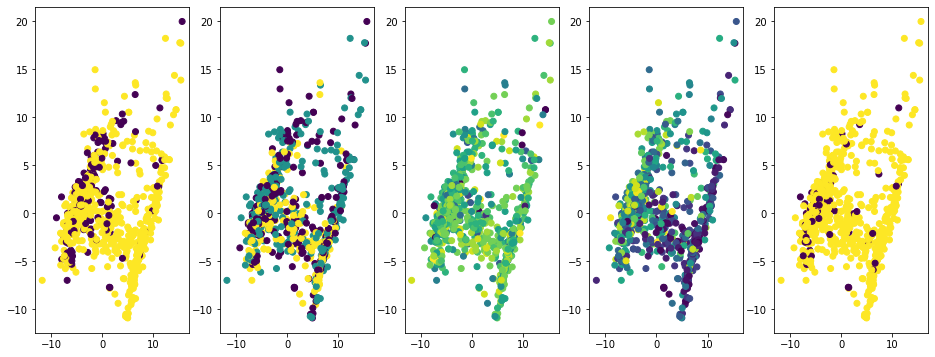

In [64]:
x_sub = np.random.choice(range(len(X)), 1000)
x_linear = pca.transform(X[x_sub])

fig, ax = plt.subplots(1, 5, figsize=(16, 6))
for i, label in enumerate(labels.keys()):
    ax[i].scatter(x_linear[:, 0], x_linear[:, 1], c=labels[label][x_sub])

In [24]:
pca_poly = KernelPCA(n_components=10, kernel='poly', n_jobs=48)
pca_poly.fit(X)
# plot_pca_explained_variance(pca_poly)

KernelPCA(kernel='poly', n_components=10, n_jobs=48)

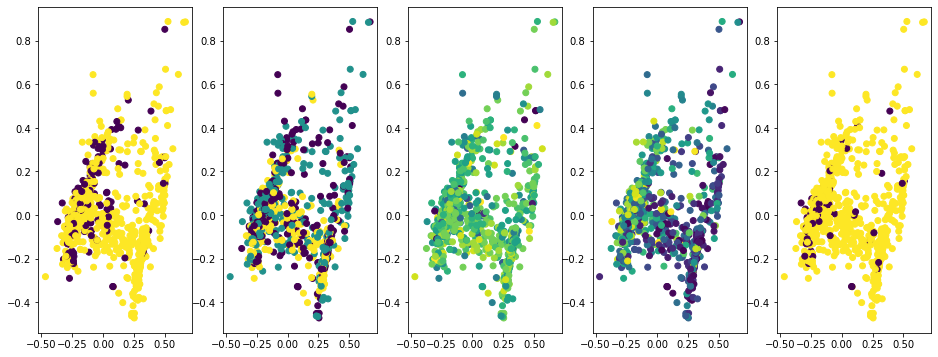

In [66]:
x_poly = pca_poly.transform(X[x_sub])

fig, ax = plt.subplots(1, 5, figsize=(16, 6))
for i, label in enumerate(labels.keys()):
    ax[i].scatter(x_poly[:, 0], x_poly[:, 1], c=labels[label][x_sub])

In [25]:
pca_rbf = KernelPCA(n_components=10, kernel='rbf', n_jobs=48)
pca_rbf.fit(X)
# plot_pca_explained_variance(pca_rbf)

KernelPCA(kernel='rbf', n_components=10, n_jobs=48)

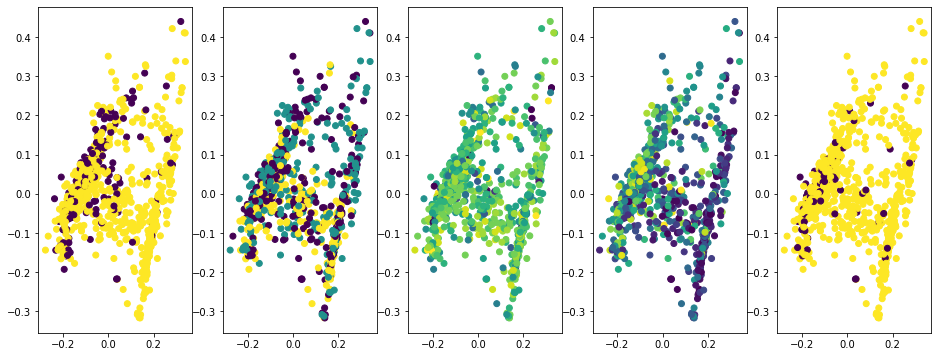

In [67]:
x_rbf = pca_rbf.transform(X[x_sub])

fig, ax = plt.subplots(1, 5, figsize=(16, 6))
for i, label in enumerate(labels.keys()):
    ax[i].scatter(x_rbf[:, 0], x_rbf[:, 1], c=labels[label][x_sub])

In [26]:
pca_sigmoid = KernelPCA(n_components=10, kernel='sigmoid', n_jobs=48)
pca_sigmoid.fit(X)
# plot_pca_explained_variance(pca_sigmoid)

KernelPCA(kernel='sigmoid', n_components=10, n_jobs=48)

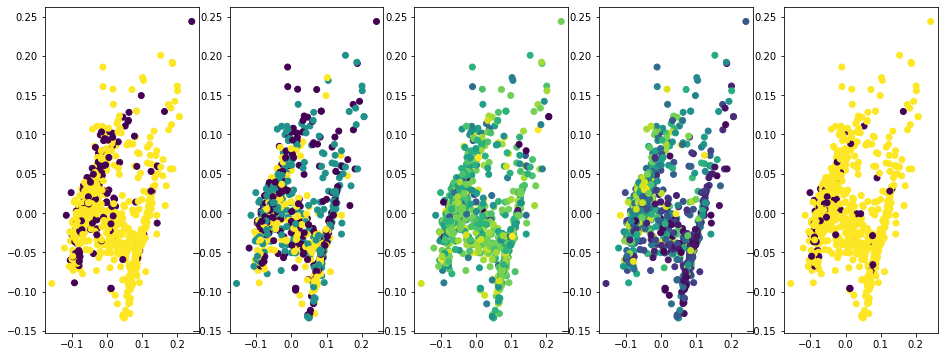

In [68]:
x_sig = pca_sigmoid.transform(X[x_sub])

fig, ax = plt.subplots(1, 5, figsize=(16, 6))
for i, label in enumerate(labels.keys()):
    ax[i].scatter(x_sig[:, 0], x_sig[:, 1], c=labels[label][x_sub])

In [27]:
pca_cosine = KernelPCA(n_components=10, kernel='cosine', n_jobs=48)
pca_cosine.fit(X)
# plot_pca_explained_variance(pca_cosine)

KernelPCA(kernel='cosine', n_components=10, n_jobs=48)

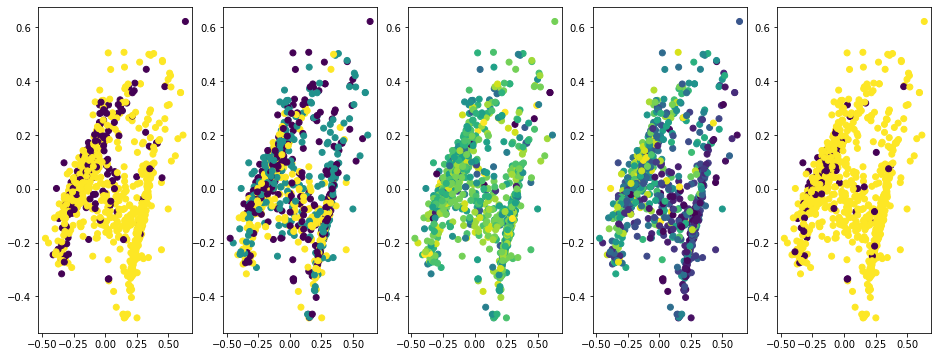

In [69]:
x_cos = pca_cosine.transform(X[x_sub])

fig, ax = plt.subplots(1, 5, figsize=(16, 6))
for i, label in enumerate(labels.keys()):
    ax[i].scatter(x_cos[:, 0], x_cos[:, 1], c=labels[label][x_sub])

# Kmeans

In [22]:
from sklearn.cluster import KMeans

scores_raw = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    scores_raw.append(kmeans.inertia_) 
    
plt.figure(figsize = (10,5))
plt.plot(scores_raw, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()

NameError: name 'scores_1' is not defined

<Figure size 720x360 with 0 Axes>

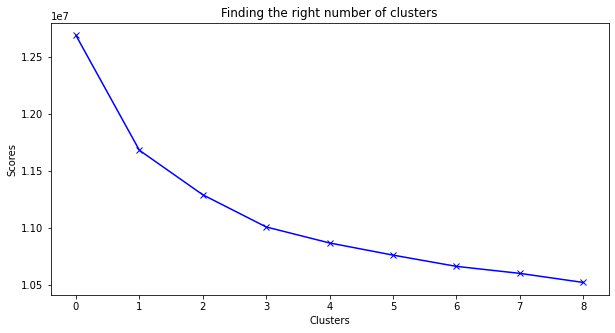

In [23]:
plt.figure(figsize = (10,5))
plt.plot(scores_raw, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()

In [28]:
# choose K=3
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

KMeans(n_clusters=3)

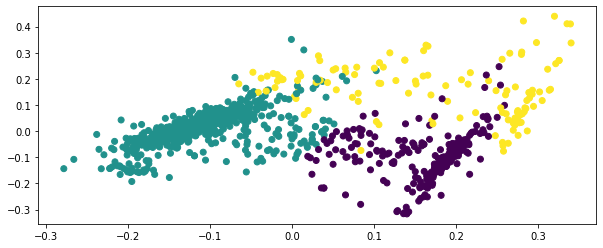

In [70]:
label_kmeans = kmeans.fit_predict(X[x_sub])

fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.scatter(x_rbf[:, 0], x_rbf[:, 1], c=label_kmeans)

In [96]:
samples_normed[:5, 90, 1]

array([0.01923077, 0.03846154, 0.00961538, 0.00961538, 0.00961538])

In [92]:
samples_normed[0][:3, np.array([i for i in range(12) if i != 1])]

array([[1.00000000e+00, 9.50000000e-01, 7.84000000e-02, 2.77310924e-01,
        2.46458924e-01, 1.52777778e-01, 1.91176471e-01, 1.23115578e-01,
        1.78571429e-03, 2.87774164e-04, 1.27088667e-02],
       [1.00000000e+00, 9.50000000e-01, 7.92000000e-02, 2.77310924e-01,
        2.54957507e-01, 1.58333333e-01, 1.94117647e-01, 1.25628141e-01,
        1.78571429e-03, 2.87774164e-04, 1.27088667e-02],
       [1.00000000e+00, 9.50000000e-01, 7.84000000e-02, 2.77310924e-01,
        2.46458924e-01, 1.52777778e-01, 1.88235294e-01, 1.23115578e-01,
        1.78571429e-03, 2.87774164e-04, 1.27088667e-02]])

# Autoencoder

In [4]:
from utils.ClassAE import *
from utils.ClassDataset import *

In [5]:
archive = pickle.load(open(os.path.join(path_processed, 'training_data_allmed.p'), 'rb'))
samples_normed = archive['samples_norm']
sample_dict= archive['sample_dict']
idx_train= archive['idx_train']
idx_test= archive['idx_test']
pid_train = archive['pid_train']
pid_test = archive['pid_test']
del archive

In [6]:
X_test = samples_normed[idx_test]
dataset_test = CusDataset(X_test)
test_loader = DataLoader(dataset_test, batch_size=16, shuffle=False, drop_last=False, num_workers=16)

In [15]:
device = 'cuda'
seq_len = 181
n_feat = 10
n_emb = 128
n_layer = 3
dropout = 0.1
lr = 1e-3

config = {
    'device': device,
    "seq_len": seq_len,
    "n_feat": n_feat,
    "n_emb": n_emb,
    'n_layer': n_layer,
    "lr": lr,
    "dropout": dropout,
}

model_file = 'models/LSTM-AE-ALLMED/3layer-128hidden-0.1dropout-64-0.001/version_0/cv2epoch192-val_loss0.00652.ckpt'
model_guided_file = 'models/GuidedLSTM-AE-ALLMED/3layer-128hidden-0.1dropout-64-0.001/version_0/cv1epoch249-val_loss0.00813.ckpt'
model = LSTM_AE_ALLMED.load_from_checkpoint(checkpoint_path=model_file, config=config).to(device)
model.eval()
model_guided = GuidedLSTM_AE_ALLMED.load_from_checkpoint(checkpoint_path=model_guided_file, config=config).to(device)
model_guided.eval()

GuidedLSTM_AE_ALLMED(
  (encoder): LSTMEncoder(
    (lstm): LSTM(10, 128, num_layers=3, batch_first=True, dropout=0.1)
  )
  (decoder): LSTMDecoder(
    (lstm): LSTM(128, 128, num_layers=3, batch_first=True, dropout=0.1)
    (out): Linear(in_features=128, out_features=10, bias=True)
  )
  (att): MultiheadAttention(
    (out_proj): NonDynamicallyQuantizableLinear(in_features=9, out_features=9, bias=True)
  )
  (fc_enc): Linear(in_features=128, out_features=128, bias=True)
  (fc_att): Linear(in_features=819, out_features=128, bias=True)
  (fc2dec): Linear(in_features=256, out_features=128, bias=True)
)

In [17]:
it=iter(test_loader)
X = next(it)
X = X['data']


X_lstm = model(X[:,:,10:].to('cuda'))
X_lstm = X_lstm.cpu().detach().numpy()

X_guidedlstm = model_guided(X.to('cuda'))
X_guidedlstm = X_guidedlstm.cpu().detach().numpy()

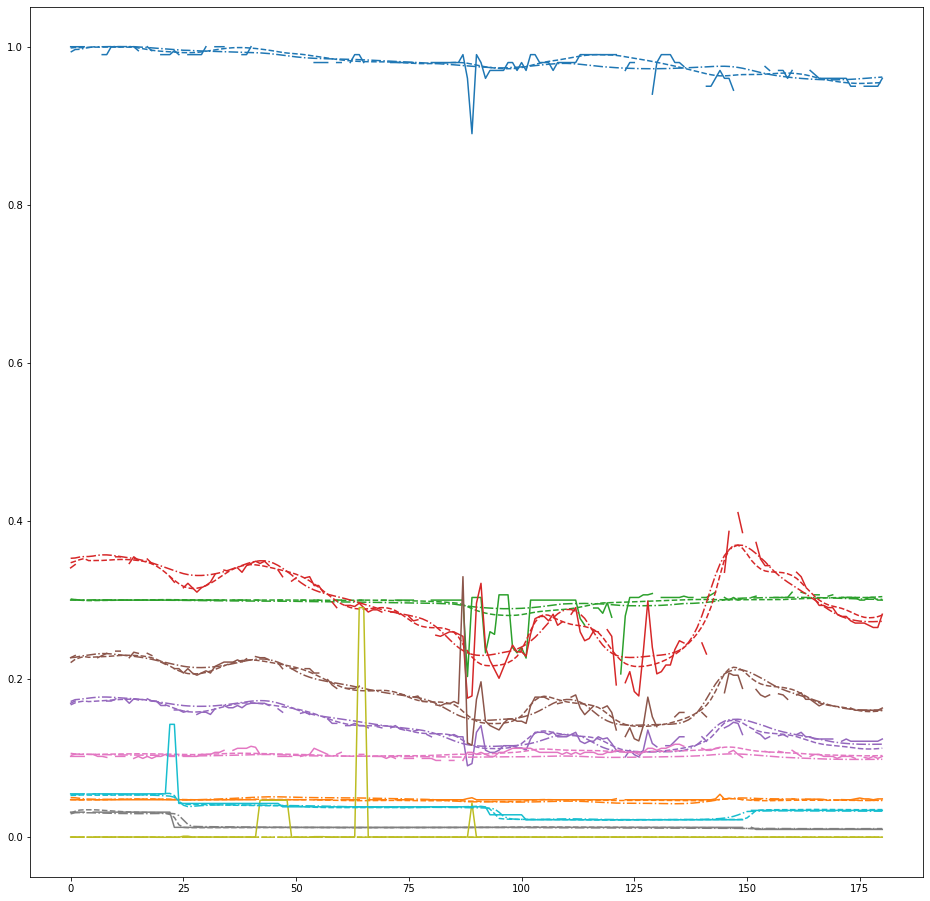

In [19]:
X[np.where(X==-1) ] = np.nan

idx = 0
x = X[idx]
x_lstm = X_lstm[idx]
x_guidedlstm = X_guidedlstm[idx]

fig, ax = plt.subplots(1,1,figsize=(16,16))
colors = plt.cm.tab10
for j in range(10):
    ax.plot(range(181), x[:, 10+j], '-', color=colors(j), label='groundtruth')
    ax.plot(range(181), x_lstm[:, j], '--', color=colors(j), label='LSTM')
    ax.plot(range(181), x_guidedlstm[:, j], '-.', color=colors(j), label='Guided LSTM')

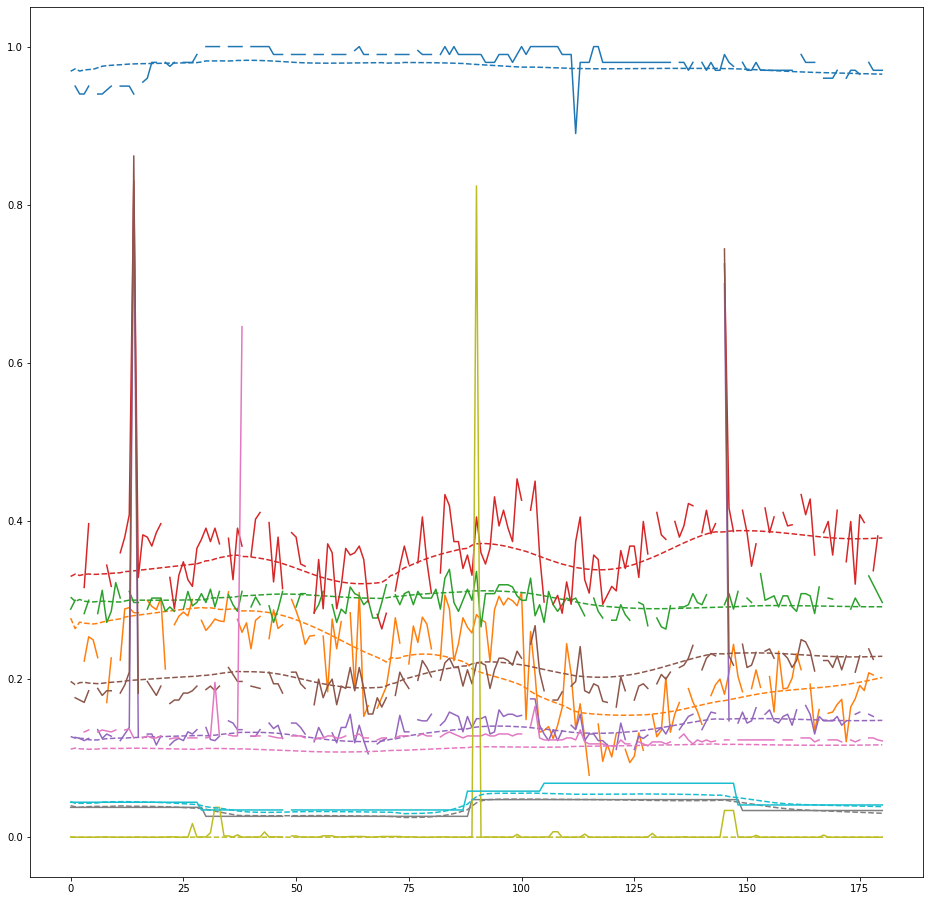

In [204]:
X[np.where(X==-1) ] = np.nan

idx = 5
x = X[idx]
x_ = X_[idx]

fig, ax = plt.subplots(1,1,figsize=(16,16))
colors = plt.cm.tab10
for j in range(10):
    ax.plot(x[:, 2+j], '-', color=colors(j))
    ax.plot(x_[:, j], '--', color=colors(j))

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7fd87cf8adc0>
Traceback (most recent call last):
  File "/home/kai/workspace/env/py38-torch/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "/home/kai/workspace/env/py38-torch/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1430, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.8/multiprocessing/process.py", line 149, in join
    res = self._popen.wait(timeout)
  File "/usr/lib/python3.8/multiprocessing/popen_fork.py", line 44, in wait
    if not wait([self.sentinel], timeout):
  File "/usr/lib/python3.8/multiprocessing/connection.py", line 930, in wait
    ready = selector.select(timeout)
  File "/usr/lib/python3.8/selectors.py", line 415, in select
    fd_event_list = self._selector.poll(timeout)
KeyboardInterrupt: 


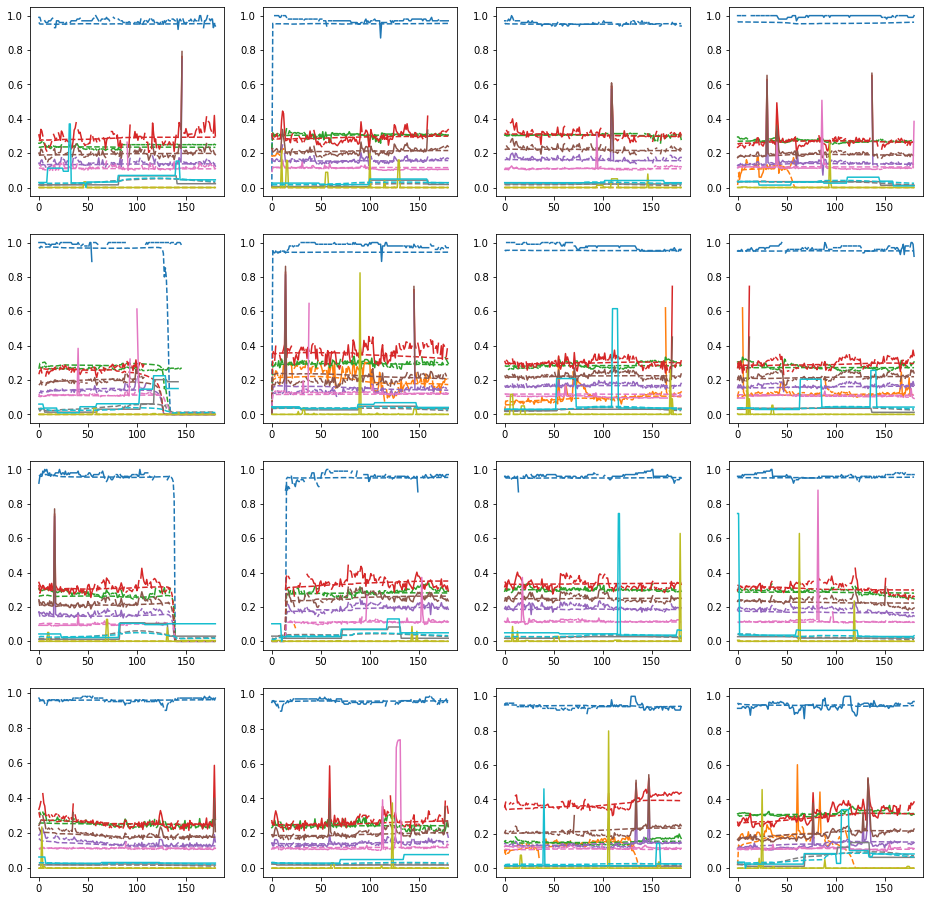

In [167]:
fig, ax = plt.subplots(4,4,figsize=(16,16))
colors = plt.cm.tab10

X[np.where(X==-1) ] = np.nan
for i, (x, x_) in enumerate(zip(X, X_)):
    for j in range(10):
        ax[i//4][i%4].plot(x[:, 2+j], '-', color=colors(j))
        ax[i//4][i%4].plot(x_[:, j], '--', color=colors(j))

# Predictor

In [7]:
from utils.ClassPredictor import *
from utils.ClassDataset import *

In [ ]:
def denorm_data(x, offset=10, norm_params=valid_ranges):
    for i in range(offset, offset+10):
        p = norm_params[i]
        x[:, i-offset] = x[:, i-offset] * (p[1] - p[0]) + p[0]
    return x

In [6]:
archive = pickle.load(open(os.path.join(path_processed, 'training_data_allmed.p'), 'rb'))
samples = archive['samples_norm']
sample_dict= archive['sample_dict']
idx_train= archive['idx_train']
idx_test= archive['idx_test']
pid_train = archive['pid_train']
pid_test = archive['pid_test']
del archive

X_test = samples[idx_test]
dataset_test = CusDataset(X_test)
test_loader = DataLoader(dataset_test, batch_size=64, shuffle=False, num_workers=16)

NameError: name 'CusDataset' is not defined

In [ ]:
len(sample_dict), len(samples)

In [8]:
los_all = [sample_dict[k]['los'] for k in sample_dict]
los_all_days = [los.total_seconds()/3600/24 for los in los_all]
min(los_all), max(los_all)

(Timedelta('0 days 03:00:00'), Timedelta('27 days 17:03:00'))

In [ ]:
los_all[0].total_seconds()/3600/24, los_all[0]

In [14]:
np.percentile(los_all_days, 50), np.percentile(los_all_days, 75), np.percentile(los_all_days, 85.5)

(1.7092050925925928, 4.445833333333334, 7.08125)

(array([64868., 17473.,  8065.,  4429.,  2846.,  1795.,  1196.,   717.,
          425.,   169.]),
 array([ 0.125     ,  2.88354167,  5.64208333,  8.400625  , 11.15916667,
        13.91770833, 16.67625   , 19.43479167, 22.19333333, 24.951875  ,
        27.71041667]),
 <BarContainer object of 10 artists>)

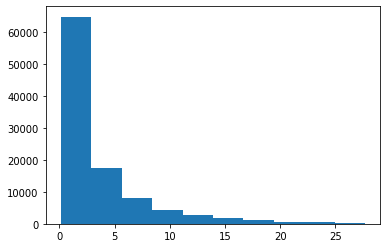

In [29]:
plt.hist(los_all_days)

In [23]:
device = 'cuda'
seq_len = 181
n_feat = 10
n_emb = 128
n_layer = 2
dropout = 0.1
lr = 1e-3

config = {
    'device': device,
    "seq_len": seq_len,
    "n_feat": n_feat,
    "n_emb": n_emb,
    'n_layer': n_layer,
    "lr": lr,
    "dropout": dropout,
    "include_med": False,
}

model_file_lstm = 'models/LSTM_PRED_ALLMED/2layer-128hidden-0.1dropout-64-0.001/version_0/cv2epoch115-val_loss0.01512.ckpt'
model_file_guidedlstm = 'models/GuidedLSTM_PRED_ALLMED/2layer-128hidden-0.1dropout-64-0.001/version_0/cv2epoch76-val_loss0.01518.ckpt'

model_lstm = LSTM_PRED_ALLMED.load_from_checkpoint(checkpoint_path=model_file_lstm, config=config).to(device)
model_lstm.eval()

model_guidedlstm = GuidedLSTM_PRED_ALLMED.load_from_checkpoint(checkpoint_path=model_file_guidedlstm, config=config).to(device)
model_guidedlstm.eval()

GuidedLSTM_PRED_ALLMED(
  (lstm): LSTM(10, 128, num_layers=2, batch_first=True, dropout=0.1)
  (att): MultiheadAttention(
    (out_proj): NonDynamicallyQuantizableLinear(in_features=9, out_features=9, bias=True)
  )
  (fc_lstm): Linear(in_features=128, out_features=10, bias=True)
  (fc_att): Linear(in_features=819, out_features=900, bias=True)
  (fc_out): Linear(in_features=1800, out_features=900, bias=True)
)

In [24]:
it=iter(test_loader)
X = next(it)
X = X['data']

X_lstm = model_lstm(X[:,:91,:].to('cuda'))
X_lstm = X_lstm.cpu().detach().numpy()

X_guidedlstm = model_guidedlstm(X[:,:91,:].to('cuda'))
X_guidedlstm = X_guidedlstm.cpu().detach().numpy()

X[np.where(X==-1) ] = np.nan

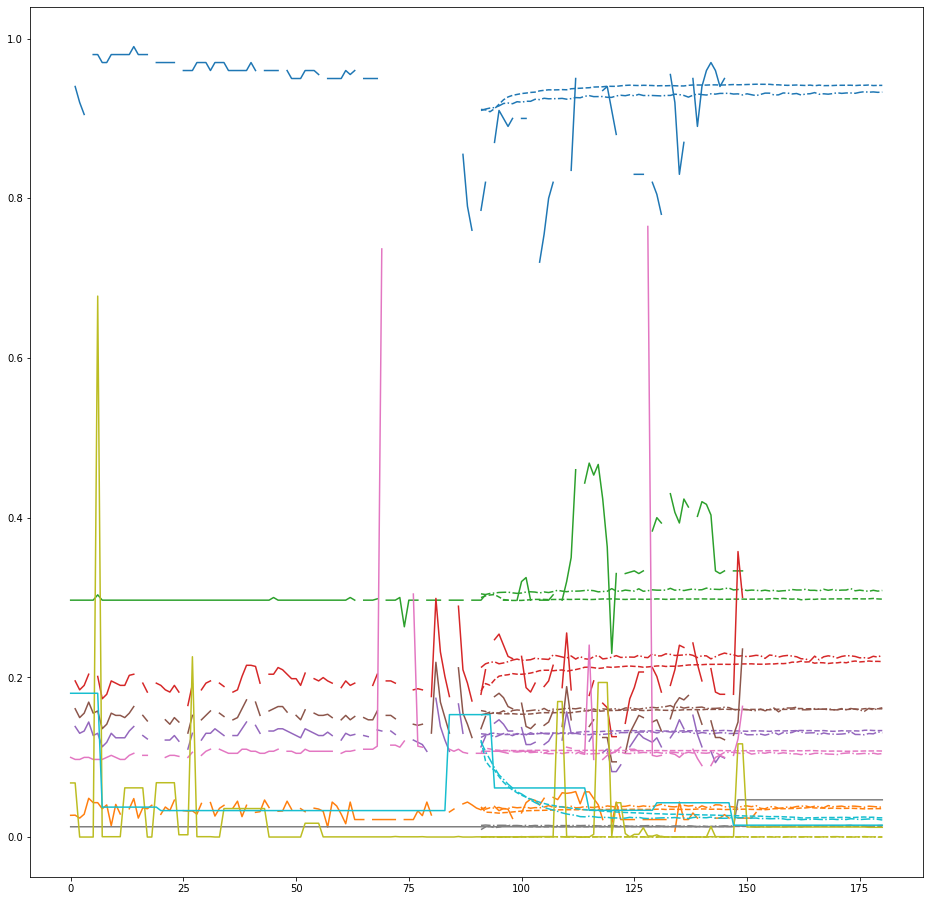

In [34]:
idx = 9
x = X[idx]
x_lstm = X_lstm[idx]
x_guidedlstm = X_guidedlstm[idx]

fig, ax = plt.subplots(1,1,figsize=(16,16))
colors = plt.cm.tab10
for j in range(10):
    ax.plot(range(181), x[:, 10+j], '-', color=colors(j), label='groundtruth')
    ax.plot(range(91,181), x_lstm[:, j], '--', color=colors(j), label='LSTM')
    ax.plot(range(91,181), x_guidedlstm[:, j], '-.', color=colors(j), label='Guided LSTM')

In [27]:
from IPython.core.display import display, HTML


display(HTML(selected_physio.to_html()))

,Unnamed: 0,variableid,variablename,category,unit,isSetting,type,shape,uid
0,0,4000,Peripheral oxygen saturation,Respiratory,%,0,n,NaN,1
1,1,8280,Peripheral oxygen saturation,Respiratory,%,0,n,NaN,1
2,2,300,Respiratory rate,Respiratory,/min,0,n,NaN,2
3,3,310,Respiratory rate,Respiratory,/min,0,n,NaN,2
4,4,15001555,Oxygen administration by mask,Respiratory,l/min,1,n,NaN,3
5,5,15001525,Oxygen administration by nasal cannula,Respiratory,l/min,1,n,NaN,4
6,6,2010,Inspired oxygen concentration,Respiratory,%,1,n,NaN,5
7,7,2600,Positive end expiratory pressure setting,Respiratory,cmH2O,1,n,NaN,6
8,8,2610,Positive end expiratory pressure,Respiratory,cmH2O,1,n,NaN,7
9,9,3845,Ventilator mode,Respiratory,Categorical,1,c,NaN,8


# Benchmark endpoints

In [28]:
path_endpoints = 'hirid_benchmark/endpoints'
df_endpoints = pd.read_parquet(path_endpoints)

In [29]:
df_endpoints

,datetime,rel_datetime,patientid,resp_failure_status,resp_failure_status_relabel,fio2_available,fio2_suppox,fio2_ambient,fio2_estimated,pao2_estimated,pao2_available,estimated_ratio,vent_state,circ_failure_status
0,2183-05-12 12:35:00,0.0,148,event_1,True,0.0,0.0,1.0,0.21,45.017586,0.0,214.369457,0.0,0.0
1,2183-05-12 12:40:00,300.0,148,event_1,True,0.0,0.0,1.0,0.21,43.275052,0.0,206.071675,0.0,0.0
2,2183-05-12 12:45:00,600.0,148,event_1,True,0.0,0.0,1.0,0.21,41.934237,0.0,199.686844,0.0,0.0
3,2183-05-12 12:50:00,900.0,148,event_1,True,0.0,0.0,1.0,0.21,40.985761,0.0,195.170290,0.0,0.0
4,2183-05-12 12:55:00,1200.0,148,event_1,True,0.0,0.0,1.0,0.21,40.390709,0.0,192.336711,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,2130-07-23 13:26:00,151800.0,33671,UNKNOWN,False,0.0,1.0,0.0,0.34,106.397342,0.0,312.933360,0.0,0.0
507,2130-07-23 13:31:00,152100.0,33671,UNKNOWN,False,0.0,1.0,0.0,0.34,100.709785,0.0,296.205250,0.0,0.0
508,2130-07-23 13:36:00,152400.0,33671,UNKNOWN,False,0.0,1.0,0.0,0.34,95.693419,0.0,281.451232,0.0,0.0
509,2130-07-23 13:41:00,152700.0,33671,UNKNOWN,False,0.0,1.0,0.0,0.34,91.292979,0.0,268.508762,0.0,0.0
